# FFNN Classification Model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Loading and Cleaning Data

In [2]:
df_raw = pd.read_csv('games-features.csv')

In [3]:
df_raw.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


### Selecting rows and columns used for analysis

In [4]:
df_raw.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

In [5]:
df_all = df_raw[['QueryName', 'Metacritic',
         #Genre variables
        'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 
         'GenreIsCasual','GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
         #Category variables
        'CategorySinglePlayer','CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport',
         #Platform variables
        'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec',
         #Additional Info
        'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount',
        'MovieCount', 'PackageCount', 'RecommendationCount', 
        'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance','SteamSpyPlayersEstimate', 
         'SteamSpyPlayersVariance','AchievementCount', 'ControllerSupport', 'FreeVerAvail', 
         'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal',
         #Variables that need transformation
         'ReleaseDate', 'SupportedLanguages', 
         #Text variables
         'Reviews','DetailedDescrip','AboutText']]

In [6]:
df = df_all[df_all['Metacritic']>0]

### Dropping Duplicates

In [7]:
df = df.drop_duplicates()

In [8]:
df_vc = pd.DataFrame(df['QueryName'].value_counts())
df_vc[df_vc['QueryName']>1]

,QueryName
Sid Meier's Civilization IV: Colonization,2
Monday Night Combat,2
Fallout: New Vegas,2
Darksiders,2
Alpha Protocol,2
Sid Meier's Civilization V,2
Sid Meier's Civilization IV: Beyond the Sword,2
Sid Meier's Civilization IV: Warlords,2
Arma 2,2
Sid Meier's Civilization IV,2


In [9]:
#drop Sid Meier's Civilization IV: Colonization dup 
df=df.drop(965)
#drop Fallout: New Vegas dup
df=df.drop(952)
#drop Sid Meier's Civilization V dup
df=df.drop(1205)
#drop Darksiders dup
df=df.drop(1210)
#drop Sid Meier's Civilization IV dup
df=df.drop(962)
#Drop Monday night combat dup
df=df.drop(1278)
#Drop Sid Meier's Civilization IV: Beyond the Sword dup
df=df.drop(964)
#Drop Sid Meier's Civilization IV: Warlords dup
df=df.drop(963)
#Drop Arma 2 dup
df=df.drop(782)
#Drop Alpha Protocol dup
df=df.drop(961)

### Cleaning Languages

In [10]:
import re
pd.set_option('display.max_rows', None)
languages = df['SupportedLanguages'].tolist()

#Split to check all languages
split_lst = []
for language in languages:
    split_lang = re.split('\* |\*|\s|\*\*', language)
    for lang in split_lang:
        split_lst.append(lang)

split_series = pd.Series(split_lst)
split_df = pd.DataFrame(split_series.value_counts())
#split_df[split_df[0]>0]
#lang_list= split_df.index.values.tolist()
#print(lang_list)

In [11]:
#Create list of all possible languages
language_list=['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']

In [12]:
#Create boolean columns for each language
for language in language_list:
    df[language]=df['SupportedLanguages'].str.contains(language)

In [13]:
#create boolean column for audio support (will delete later, using this as reference to check regex)
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==True, 'audio_support?'] = 1
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==False, 'audio_support?'] = 0

In [14]:
#Create transformed language columns without "languages with full audio support" statement
df['transformed']= df['SupportedLanguages'].str.extract("(.+?)\*languages with full audio support")

In [15]:
#Count * in transformed column to count number of languages with audio support
df['num_lang_audio_support']=df['transformed'].str.count('\*')
df['num_lang_audio_support'] = df['num_lang_audio_support'].fillna(0)

In [16]:
#Convert bool to numeric and sum
df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']] = df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].replace({True: 1, False: 0})

df['num_languages']=df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].sum(axis=1)

In [17]:
#Drop columns used in transformations
df=df.drop("transformed", axis=1)
df=df.drop("audio_support?", axis=1)

### Cleaning Dates

In [18]:
#Check for dates with inaccurate format
df['ReleaseDate'][df['ReleaseDate'].str.fullmatch('[a-zA-Z]{3}\s\d*?\s\d{4}')==False]

305                Feb 2011
529                        
572                        
668                Jun 2009
687                Jul 2010
904                Sep 2009
1008                       
1180               Mar 2010
1199                       
1228               Apr 2010
1253               Jul 2010
1268               Oct 2010
1269               Oct 2010
1578                       
1856                       
1922                       
1993                       
2171                       
2183                       
2201                       
2214                       
2317               Aug 2013
3805               Nov 2014
4103               May 2015
4943               Jun 2015
12068    December 20th 2016
Name: ReleaseDate, dtype: object

In [19]:
#Convert these dates to accurate format, replace blanks with NAs
df['ReleaseDate']= df['ReleaseDate'].replace({'Oct 2010': 'Oct 1 2010', 'Jul 2010':'Jul 1 2010', 'Aug 2013': 'Aug 2013',
                          'Jun 2015': 'Jun 1 2015', 'December 20th 2016': 'Dec 20 2016',
                          'May 2015': 'May 1 2015', 'Nov 2014': 'Nov 1 2014', 'Sep 2009':'Sep 1 2009',
                          'Jun 2009': 'Jun 1 2009', 'Feb 2011':'Feb 1 2011', 'Mar 2010':'Mar 1 2010',
                          'Apr 2010': 'Apr 1 2010', 'Aug 2013': 'Aug 1 2013'})
df['ReleaseDate'] = df['ReleaseDate'].replace(r'^\s*$', np.nan, regex=True)

In [20]:
#Convert to datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [21]:
#check data type
df['ReleaseDate'].dtype

dtype('<M8[ns]')

In [22]:
df.describe()

,Metacritic,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,...,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2.235000e+03,2235.000000,2.235000e+03,...,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,72.008501,2.508277,0.186577,1.087696,1.502013,1.798210,1.680984,4.552546e+03,11.968680,5.867512e+05,...,0.027740,0.015660,0.013870,0.008949,0.008949,0.008949,0.008501,0.000447,1.216555,4.945861
std,11.152135,5.984335,0.391950,0.362037,5.995998,1.829089,1.023349,3.541729e+04,7.336697,2.455699e+06,...,0.164265,0.124184,0.116979,0.094194,0.094194,0.094194,0.091829,0.021152,2.172011,4.165792
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,66.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.370000e+02,8.000000,3.560100e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,73.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.180000e+02,10.000000,1.303870e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,80.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.118500e+03,14.000000,4.602110e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
max,96.000000,18.000000,2.000000,5.000000,169.000000,20.000000,11.000000,1.427633e+06,114.000000,9.068758e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,27.000000


# Creating Metacritic Binary Variable

(array([  0.,   0.,   5.,  18.,  67., 209., 517., 814., 536.,  69.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

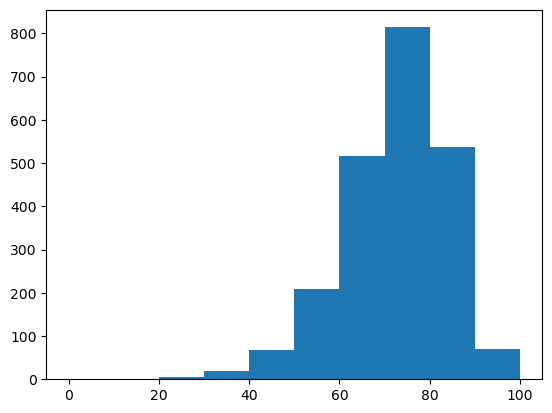

In [23]:
#plot metacritic values
plt.hist(df['Metacritic'], bins=[0,10,20,30,40,50,60,70,80,90,100])

In [24]:
#set positive to 1, negative to 0, and neutral to -1 (will be dropped later)
conditions = [(df['Metacritic']<=65),
              (df['Metacritic']>65)&(df['Metacritic']<80),
              (df['Metacritic']>=80)
             ]
choices = [0, -1, 1]
df['Metacritic_binary'] = np.select(conditions, choices, default=-1)

(array([1088.,    0.,    0.,    0.,    0.,  542.,    0.,    0.,    0.,
         605.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

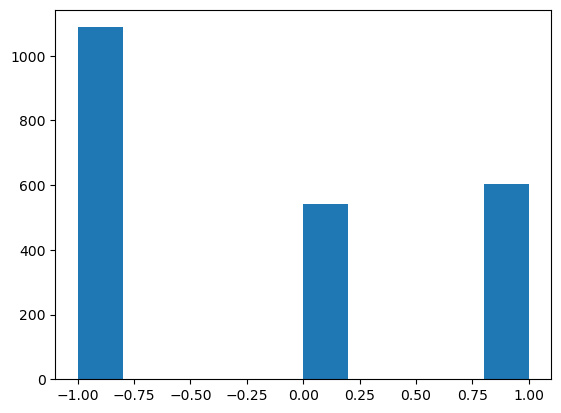

In [25]:
#check for equal distribution of pos and neg
plt.hist(df['Metacritic_binary'])

# Feed Forward Neural Network

In [26]:
# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
sns.set(style="darkgrid")  # default style
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras import metrics
tf.get_logger().setLevel('INFO')

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')


2023-04-06 16:30:34.042796: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
#select columns to work with for linear regression
df_nn = df[['Metacritic_binary', 'GenreIsNonGame', 'GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy',
       'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess',
       'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
       'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'PlatformWindows',
       'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
       'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
       'MacReqsHaveRec', 'RequiredAge', 'DemoCount', 'DeveloperCount',
       'DLCCount', 'MovieCount', 'PackageCount', 'RecommendationCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'ControllerSupport', 'FreeVerAvail',
       'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal', 'ReleaseDate',
       'English', 'German', 'French', 'Spanish', 'Italian', 'Russian',
       'Polish', 'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean',
       'Simplified Chinese', 'Dutch', 'Traditional Chinese', 'Portuguese',
       'Hungarian', 'Turkish', 'Swedish', 'Danish', 'Norwegian', 'Finnish',
       'Ukrainian', 'Romanian', 'Thai', 'Greek', 'Bulgarian', 'Arabic',
       'Slovakian', 'num_lang_audio_support']]

In [28]:
df_nn = df_nn.dropna()
df_nn = df_nn[df_nn['Metacritic_binary'] >= 0]
df_nn.head()

,Metacritic_binary,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,...,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support
0,1,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0.0
6,1,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0.0
7,0,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0.0
10,1,False,False,True,False,False,False,False,False,False,...,1,1,0,0,1,0,0,0,0,10.0
11,1,False,False,True,False,False,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0.0


In [29]:
#make columns for month and year, drop date column
df_nn['Year'] = df_nn['ReleaseDate'].dt.year 
df_nn['Month'] = df_nn['ReleaseDate'].dt.month_name()
df_nn=df_nn.drop('ReleaseDate', axis=1)

In [30]:
#Make dummy variables for months
df_nn = pd.concat([df_nn, pd.get_dummies(df_nn['Month'])], axis=1)
df_nn = df_nn.drop('Month', axis=1)

In [31]:
#Make booleans numeric
df_nn=df_nn.replace({True: 1, False: 0})

In [32]:
#Shuffle rows
df_nn_shuffled= df_nn.sample(frac=1, random_state=1).reset_index()
df_nn_shuffled.shape

(1144, 91)

In [33]:
# select features for training
features = ['GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
        'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
        'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
        'GenreIsSports', 'GenreIsRacing', 'CategorySinglePlayer',
        'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
        'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
        'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'PlatformWindows',
        'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
        'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
        'MacReqsHaveRec', 'RequiredAge', 'DemoCount', 'DeveloperCount',
        'DLCCount', 'MovieCount', 'PackageCount', 'RecommendationCount',
        'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
        'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
        'AchievementCount', 'ControllerSupport', 'FreeVerAvail',
        'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal', 'English', 'German',
        'French', 'Spanish', 'Italian', 'Russian', 'Polish', 'Japanese',
        'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 'Dutch',
        'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish',
        'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai',
        'Greek', 'Bulgarian', 'Arabic', 'Slovakian', 'num_lang_audio_support',
        'Year', 'April', 'August', 'December', 'February', 'January', 'July',
        'June', 'March', 'May', 'November', 'October', 'September']

# Use a ~80/20 train/test split.
nn_train = df_nn_shuffled[:900]
nn_test = df_nn_shuffled[900:]

# Create separate variables for features (inputs) and labels (outputs).
# We will be using these in the cells below.
X_train = nn_train[features].values
X_test = nn_test[features].values
y_train = nn_train['Metacritic_binary'].values
y_test = nn_test['Metacritic_binary'].values

# Confirm the data shapes are as expected.
print('train data shape:', X_train.shape)
print('train labels shape:', y_train.shape)
print('test data shape:', X_test.shape)
print('test labels shape:', y_test.shape)

train data shape: (900, 89)
train labels shape: (900,)
test data shape: (244, 89)
test labels shape: (244,)


In [34]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [35]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(900, 89)
(244, 89)


In [182]:
from tensorflow.keras import initializers

def build_model(num_features,
               hidden_layer_sizes=[]):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    
    # Add hidden layers with activation and dropout regularization.
    for hidden_layer_size in hidden_layer_sizes:
        model.add(Dense(units=hidden_layer_size, activation='tanh'))
        model.add(tf.keras.layers.Dropout(rate=0.1))

    model.add(tf.keras.layers.Dropout(rate=0.3)) 
    
    # create output layer
    model.add(tf.keras.layers.Dense(
        activation = 'sigmoid',          # linear activation is used
        units=1,                    # there is a single output
        use_bias=True,               # include a learned bias parameter
        kernel_initializer=initializers.RandomNormal(stddev=0.01),
        bias_initializer=initializers.RandomNormal(stddev=0.01),
        name="Output"
      ))
    
    
  # Use binary cross entropy as our loss and the Adam optimizer.
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer =  tf.keras.optimizers.Adam(learning_rate=0.0001), #learning_rate=lr_schedule
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1],hidden_layer_sizes=[128, 32])

Epoch 1/20
41/41 [==============================] - 0s 4ms/step - loss: 0.6902 - binary_accuracy: 0.5432 - val_loss: 0.6835 - val_binary_accuracy: 0.6333
Epoch 2/20
41/41 [==============================] - 0s 1ms/step - loss: 0.6875 - binary_accuracy: 0.5914 - val_loss: 0.6798 - val_binary_accuracy: 0.6889
Epoch 3/20
41/41 [==============================] - 0s 1ms/step - loss: 0.6845 - binary_accuracy: 0.6074 - val_loss: 0.6759 - val_binary_accuracy: 0.6889
Epoch 4/20
41/41 [==============================] - 0s 1ms/step - loss: 0.6797 - binary_accuracy: 0.6383 - val_loss: 0.6708 - val_binary_accuracy: 0.7000
Epoch 5/20
41/41 [==============================] - 0s 1ms/step - loss: 0.6751 - binary_accuracy: 0.6580 - val_loss: 0.6648 - val_binary_accuracy: 0.7222
Epoch 6/20
41/41 [==============================] - 0s 1ms/step - loss: 0.6680 - binary_accuracy: 0.6704 - val_loss: 0.6576 - val_binary_accuracy: 0.7222
Epoch 7/20
41/41 [==============================] - 0s 1ms/step - loss: 0.66

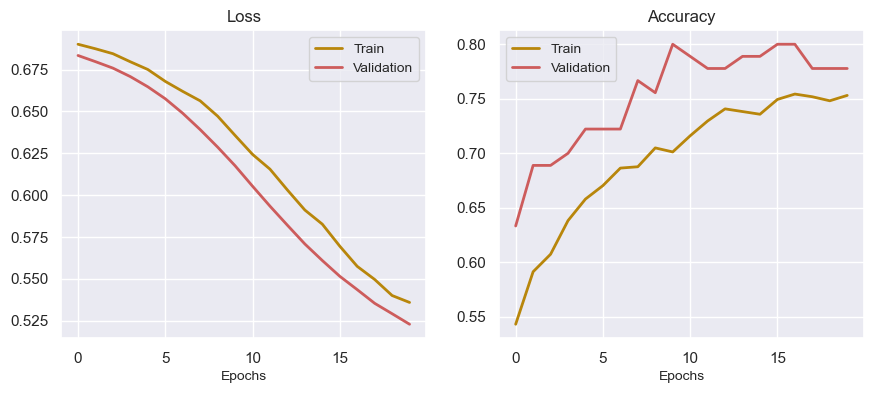

In [183]:
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=20,
  batch_size=20,
  validation_split=0.1,
  verbose=1
)

# grab history
history = history.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

# Evaluation

In [184]:
#calculate accuracy
y_test_pred_tf = model.predict(x=X_test_scaled).flatten()
y_test_pred_tf = np.where(y_test_pred_tf>=0.5, 1, 0)

print('Test, misclassified examples: %d' % (y_test != y_test_pred_tf).sum())
error_test_tf = (y_test != y_test_pred_tf).sum()/len(y_test_pred_tf)
print('Test, prediction accuracy: %.3f'% (1-error_test_tf))

8/8 [==============================] - 0s 725us/step
Test, misclassified examples: 71
Test, prediction accuracy: 0.709


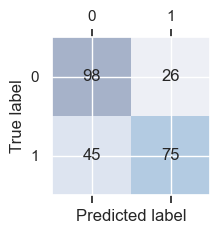

In [185]:
#create confusion matrix
def confusion_matrix_plot(conf_matrix):
    """ Confusion matrix matplotlib plot
    # param conf_matrix: nested list of TP, TN, FP, FN
    # return: None
    """
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()
    
conf_matrix = tf.math.confusion_matrix(
    y_test,
    y_test_pred_tf,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
confusion_matrix_plot(conf_matrix.numpy())

In [186]:
#Precision Score
p = tf.keras.metrics.Precision(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)
p.update_state(y_test, y_test_pred_tf)  #18/(18+3)
print("Precision score: %3f" %p.result().numpy())

Precision score: 0.742574


In [187]:
#Recall Score
r = tf.keras.metrics.Recall(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)
r.update_state(y_test, y_test_pred_tf) #18/(18+1)
print("Recall score: %.3f" %r.result().numpy())

Recall score: 0.625


In [188]:
#F1 Score
print("F1 score:",
    2*((p.result().numpy()*r.result().numpy())/(p.result().numpy()+r.result().numpy())))

F1 score: 0.6787330508232117
